<a href="https://colab.research.google.com/github/Sushantkm/Deep-Learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

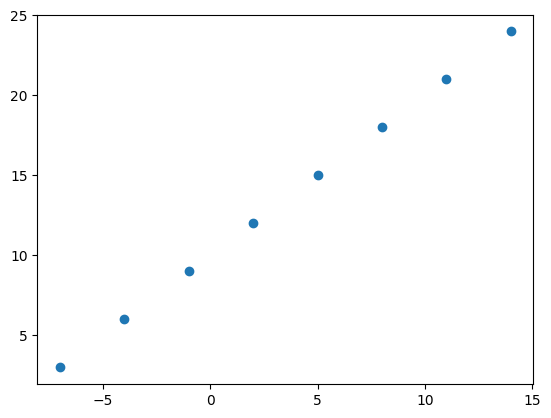

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizie it
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#  Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

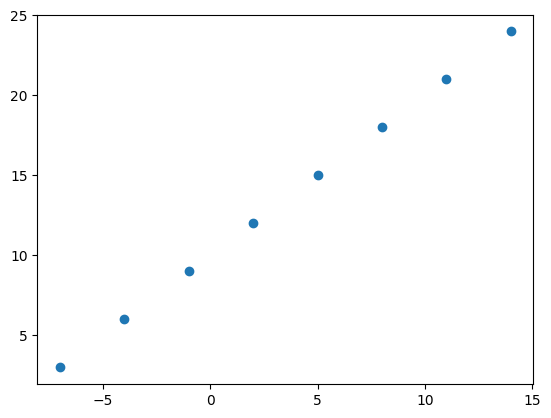

In [ ]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of deep a learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # short for stochastic gradient descent
# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 664ms/step - loss: 15.2047 - mae: 15.2047
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 14.9452 - mae: 14.9452
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 14.8127 - mae: 14.8127
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 14.6802 - mae: 14.6802
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 14.5477 - mae: 14.5477


In [ ]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 399ms/step


array([[-4.6285815]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

**Note:** Learning rate is the most important hyper parameter.

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[29.55952]], dtype=float32)

In [ ]:
# # Let's rebuild our model
# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),
#     tf.keras.layers.Dense(1, input_shape=(1,))
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               metrics=['mae'])

# # 3. Fit the model
# model.fit(X, y, epochs=100)

In [ ]:
# y_pred = model.predict([17.0])
# y_pred

In [ ]:
# # Let's rebuild our model
# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, input_shape=(1,)),
#     tf.keras.layers.Dense(1, input_shape=(1,))
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
#               metrics=['mae'])

# # 3. Fit the model
# model.fit(X, y, epochs=100)

In [ ]:
# y_pred = model.predict([17.0])
# y_pred

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(50, input_shape=(1,), activation="relu"),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(loss="mae",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#               metrics=["mae"])

# model.fit(X, y, epochs=100)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.55952]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation... there are 3 words youshould memorize:

>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The mode itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels).

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

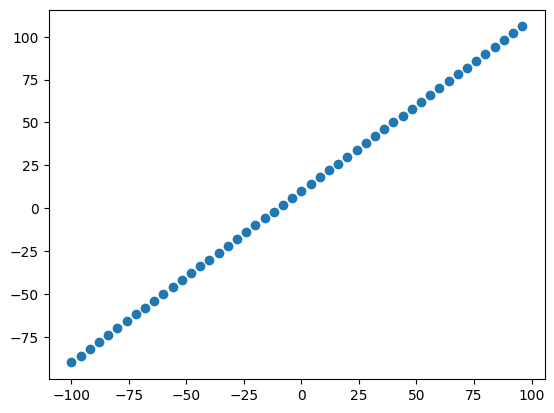

In [ ]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the lrngth of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualising the data

Now we've got our data in the training and test sets... let's visualize it again!

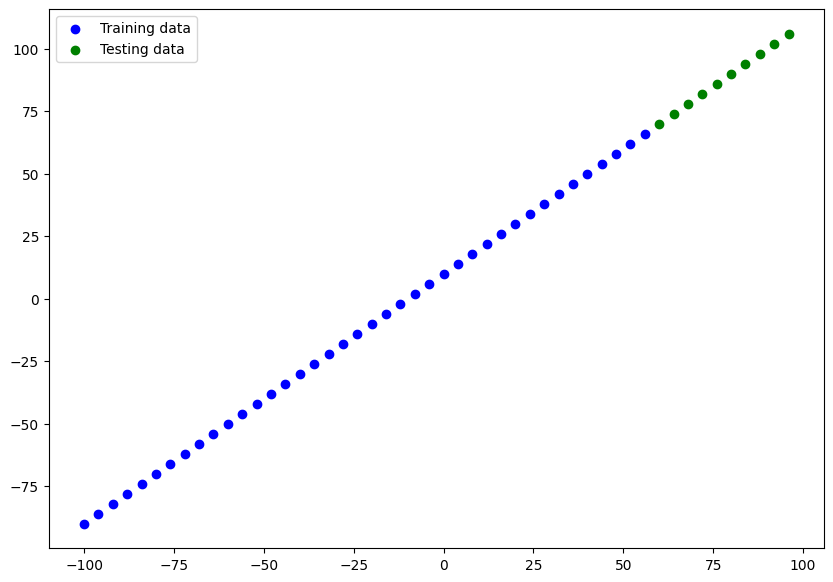

In [ ]:
plt.figure(figsize=(10,7))
#  Plot the training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data") #want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting the model
model.fit(X_train, y_train, epochs=100, verbose=0)


In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 200ms/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


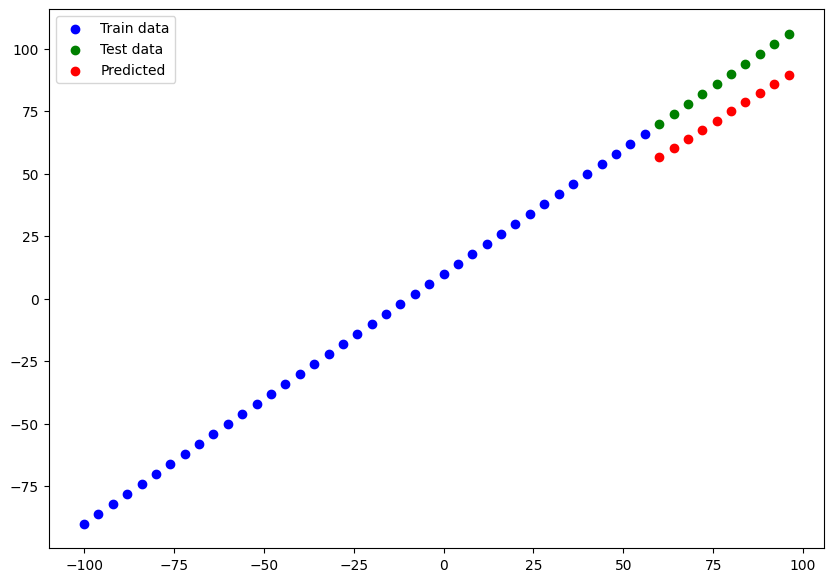

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend();

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's make a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer",activation="relu"),
    tf.keras.layers.Dense(5, activation="relu", name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Total Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters fom othe models during **transfer learning**).

📖 **Resource:** For a more in-depth overiew of the trainable parameters within a layer, check our [MIT's introduction to Deep Learning](https://www.youtube.com/watch?v=QDX-1M5Nj7s).

⚒ **Exercise:** Try playing around the number of hidden units in dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.predict(X_test)

1/1 [==============================] - 0s 247ms/step


array([[ 70.98766 ],
       [ 75.37214 ],
       [ 79.756615],
       [ 84.1411  ],
       [ 88.52557 ],
       [ 92.91004 ],
       [ 97.29453 ],
       [101.67899 ],
       [106.063484],
       [110.44797 ]], dtype=float32)

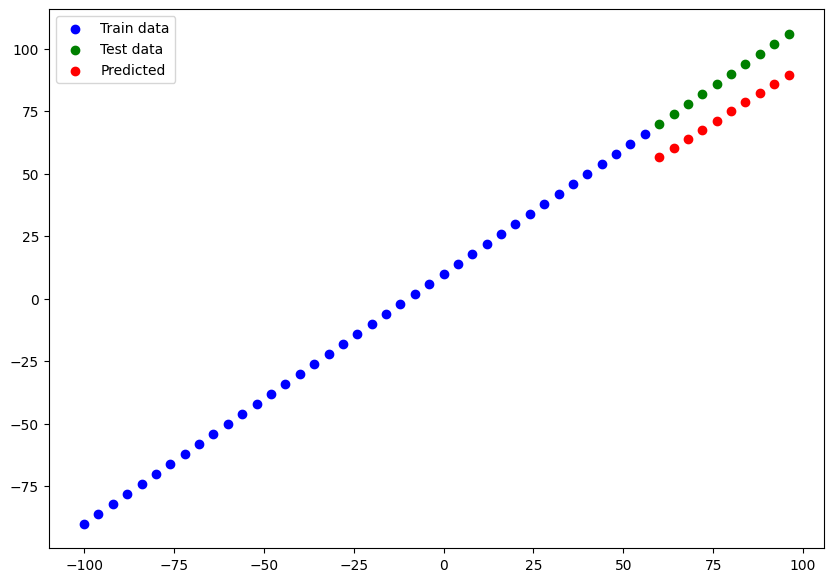

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend();

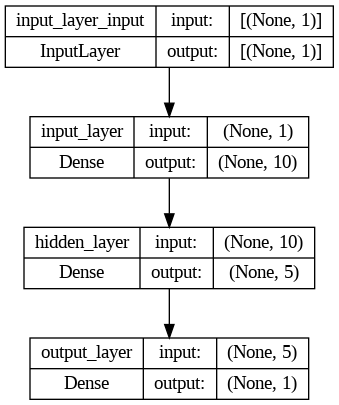

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[ 70.98766 ],
       [ 75.37214 ],
       [ 79.756615],
       [ 84.1411  ],
       [ 88.52557 ],
       [ 92.91004 ],
       [ 97.29453 ],
       [101.67899 ],
       [106.063484],
       [110.44797 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

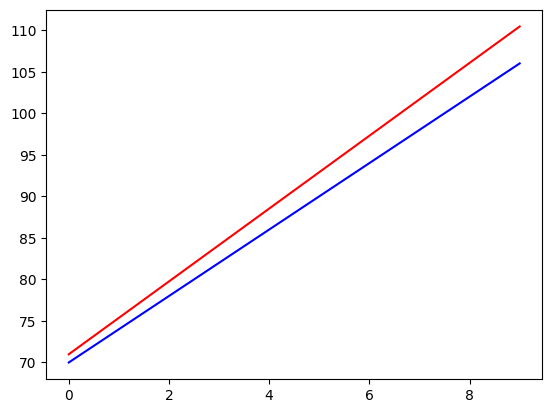

In [ ]:
plt.plot(y_test, c='b')
plt.plot(y_pred, c='r')

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it in a function.

In [ ]:
# Let's creata a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

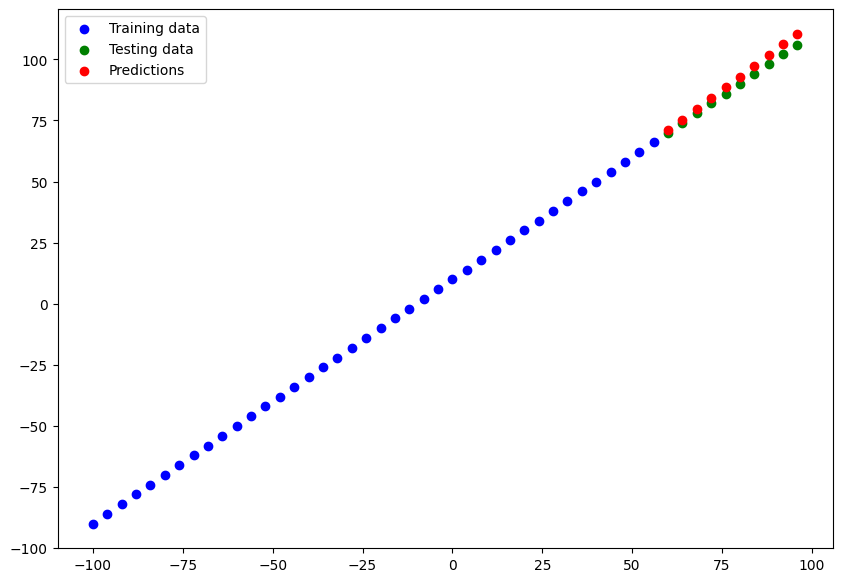

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

# Evaluating our model's predictions with regression evaluation matrix

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "average the square of errors"

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 634ms/step - loss: 2.7178 - mae: 2.7178


[2.717810869216919, 2.717810869216919]

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.98766 ],
       [ 75.37214 ],
       [ 79.756615],
       [ 84.1411  ],
       [ 88.52557 ],
       [ 92.91004 ],
       [ 97.29453 ],
       [101.67899 ],
       [106.063484],
       [110.44797 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Gets rid of the extra dimension in our tensor from shape=(10, 1) to shape=(10,)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.98766 ,  75.37214 ,  79.756615,  84.1411  ,  88.52557 ,
        92.91004 ,  97.29453 , 101.67899 , 106.063484, 110.44797 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.7178109>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=8.606036>

In [ ]:
huber = tf.keras.losses.huber(y_test, tf.squeeze(y_pred))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=2.2178185>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

def huber(y_true, y_pred):
  return tf.keras.losses.huber(y_test, tf.squeeze(y_pred))


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more comples model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 32ms/step - loss: 104.0656 - mae: 104.0656
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 68.6101 - mae: 68.6101
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 31.1832 - mae: 31.1832
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 9.7388 - mae: 9.7388
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 10.6685 - mae: 10.6685
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.8756 - mae: 9.8756
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 8.9468 - mae: 8.9468
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 9.1052 - mae: 9.1052
Epoch 9/100
2/2 [==============================] - 0s 39ms/step - loss: 19.6368 - mae: 19.6368
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 10.6284 - mae: 10.6284
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 147ms/step


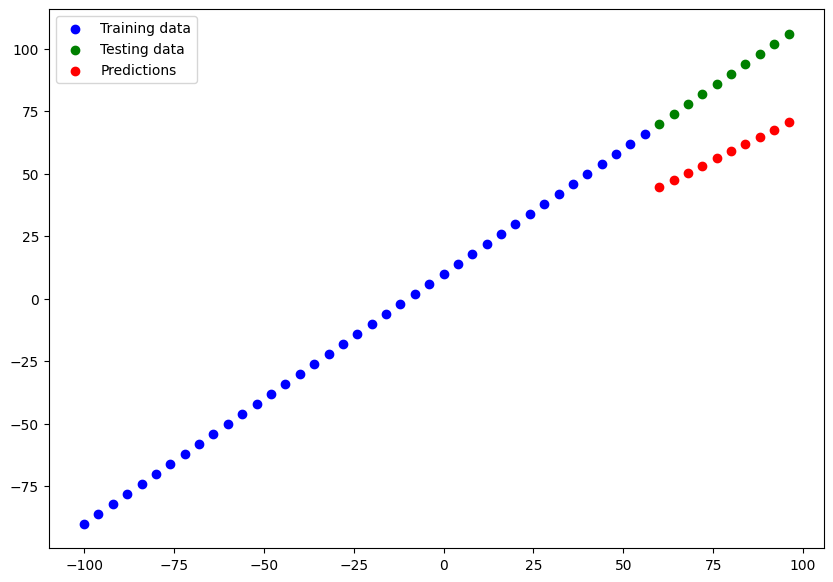

In [ ]:
# Make and plot predicstions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.444016>,
 <tf.Tensor: shape=(), dtype=float32, numpy=937.0707>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
], name="model_2")

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 4. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 39.5719 - mse: 2346.8157
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.1287 - mse: 746.1731
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 29.3946 - mse: 1290.6539
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 27.4571 - mse: 1112.3030
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.9656 - mse: 282.3198
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8942 - mse: 169.4892
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2080 - mse: 151.5909
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0873 - mse: 160.9871
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.5227 - mse: 2593.2415
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.9102 - mse: 1097.8127
Epoch 11/100
2/2 [======================

1/1 [==============================] - 0s 140ms/step


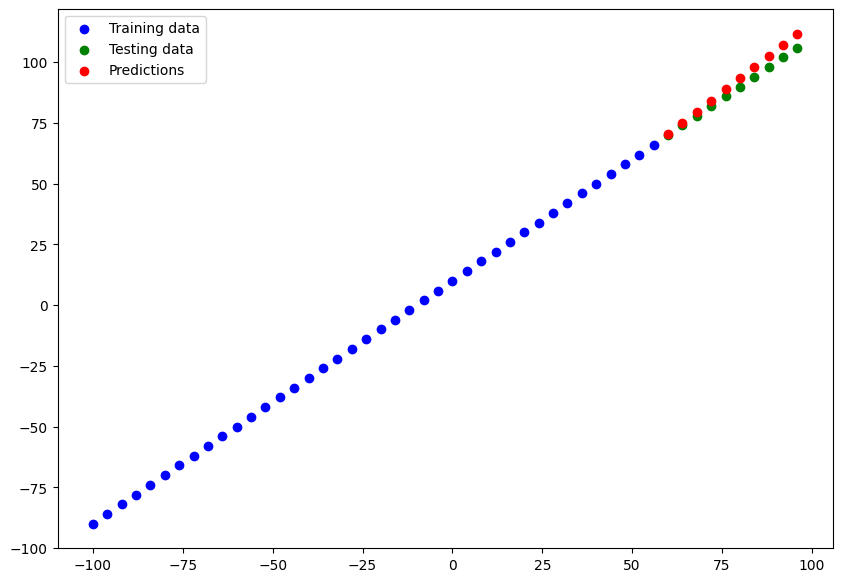

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1001282>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.423298>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 29ms/step - loss: 32.7144 - mse: 1482.7004
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 27.5689 - mse: 993.9699
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 33.0069 - mse: 1622.1028
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 26.1817 - mse: 998.3149
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.3690 - mse: 254.1544
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4782 - mse: 150.3091
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 12.5200 - mse: 207.0010
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.9956 - mse: 146.1018
Epoch 9/500
2/2 [==============================] - 0s 20ms/step - loss: 39.2135 - mse: 2401.2114
Epoch 10/500
2/2 [==============================] - 0s 23ms/step - loss: 26.7689 - mse: 1007.5801
Epoch 11/500
2/2 [====================

1/1 [==============================] - 0s 324ms/step


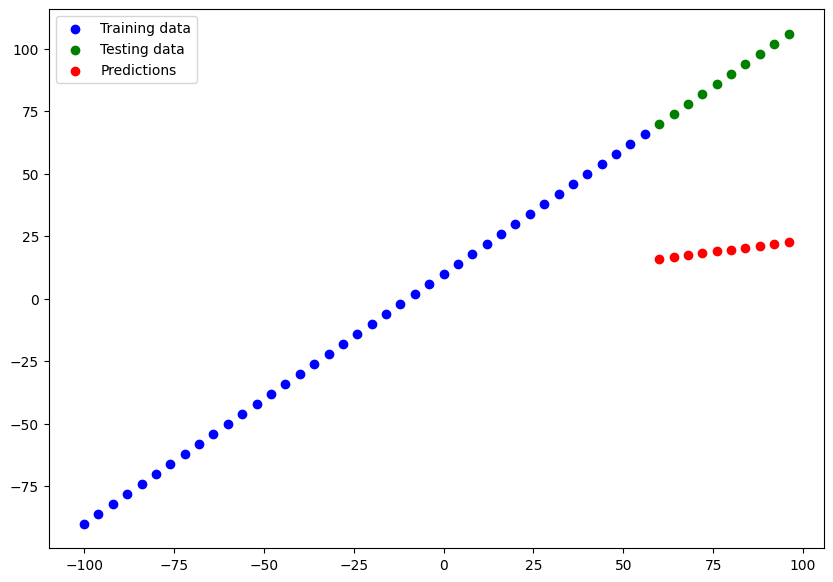

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69438>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.381>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's comapre the results.

In [ ]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
df = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
df

,Model,MAE,MSE
0,model_1,30.444016,937.070679
1,model_2,3.100128,12.423298
2,model_3,68.694382,4805.380859


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remeber the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they are trained) such as in a web application or a mobile app.

There are two main formats we can save our model's to:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save the model using the SavedModel format
model_2.save("01_model_2")

In [ ]:
# Save the model using the HDF5 format
model_2.save("01_model_2_hdf5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/01_model_2")
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
saved_y_pred = loaded_SavedModel_format.predict(X_test)
model_2_preds == saved_y_pred

1/1 [==============================] - 0s 87ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('01_model_2_hdf5.h5')
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 112ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/01_model_2_hdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/01_model_2_hdf5.h5 /content/drive/MyDrive/Models

In [ ]:
!ls /content/drive/MyDrive/Models

01_model_2_hdf5.h5


## A larger example

* Dataset Kaggle Link: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

* Dataset Github link: [Insurance](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['smoker'], insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_encoded = pd.get_dummies(insurance)
insurance_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_encoded.drop(['charges'], axis=1)
y = insurance_encoded['charges']
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, X_train.shape, X_test.shape

((1338, 11), (1070, 11), (268, 11))

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8730.7012 - mae: 8730.7012
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7859.9590 - mae: 7859.9590
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7565.8667 - mae: 7565.8667
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7598.4971 - mae: 7598.4971
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.4399 - mae: 7673.4399
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7577.3936 - mae: 7577.3936
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7516.3599 - mae: 7516.3599
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7800.5586 - mae: 7800.5586
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7623.1074 - mae: 7623.1074
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7737.3252 - mae: 7737.3252

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8759.2607 - mae: 8759.2607


[8759.2607421875, 8759.2607421875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. (insert your own experiment here)

In [ ]:
# insurance_model_2.evaluate(X_test, y_test)

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13313.0176 - mae: 13313.0176
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13162.5752 - mae: 13162.5752
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12851.2598 - mae: 12851.2598
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12235.5234 - mae: 12235.5234
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11168.8037 - mae: 11168.8037
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9717.7695 - mae: 9717.7695
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8308.8154 - mae: 8308.8154
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7555.3657 - mae: 7555.3657
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7412.6665 - mae: 7412.6665
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7390.7021 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4850.0674 - mae: 4850.0674


[4850.0673828125, 4850.0673828125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8759.2607 - mae: 8759.2607


[8759.2607421875, 8759.2607421875]

In [ ]:
# Increase epochs to 200
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 8650.7998 - mae: 8650.7998
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7875.3813 - mae: 7875.3813
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7531.1182 - mae: 7531.1182
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7681.2285 - mae: 7681.2285
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7719.4688 - mae: 7719.4688
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7653.1455 - mae: 7653.1455
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7667.9937 - mae: 7667.9937
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7741.7661 - mae: 7741.7661
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7593.8501 - mae: 7593.8501
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7760.2065 - mae: 7760.2065

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5533.2915 - mae: 5533.2915


[5533.29150390625, 5533.29150390625]

In [ ]:
# Increase epoch, layersa and change optimizer to Adam
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13303.7002 - mae: 13303.7002
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13125.7832 - mae: 13125.7832
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12766.2646 - mae: 12766.2646
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12069.2861 - mae: 12069.2861
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10909.8037 - mae: 10909.8037
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9443.6230 - mae: 9443.6230
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8122.3169 - mae: 8122.3169
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7510.2598 - mae: 7510.2598
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7417.6118 - mae: 7417.6118
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7397.9678 - mae:

In [ ]:
# Evaluate 4th model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3490.7756 - mae: 3490.7756


[3490.775634765625, 3490.775634765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8759.2607 - mae: 8759.2607


[8759.2607421875, 8759.2607421875]

Text(0.5, 0, 'epochs')

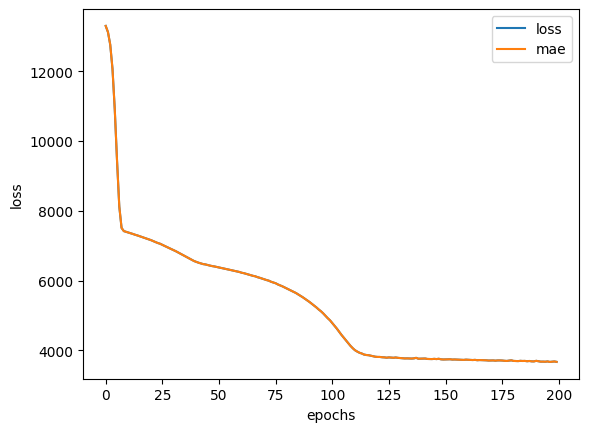

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Increase insurance_model_4's epochs
tf.random.set_seed(42)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_5.fit(X_train, y_train, epochs=800)

Epoch 1/800
34/34 [==============================] - 1s 3ms/step - loss: 13278.7764 - mae: 13278.7764
Epoch 2/800
34/34 [==============================] - 0s 3ms/step - loss: 13103.5869 - mae: 13103.5869
Epoch 3/800
34/34 [==============================] - 0s 3ms/step - loss: 12742.7236 - mae: 12742.7236
Epoch 4/800
34/34 [==============================] - 0s 3ms/step - loss: 12045.4463 - mae: 12045.4463
Epoch 5/800
34/34 [==============================] - 0s 3ms/step - loss: 10895.8730 - mae: 10895.8730
Epoch 6/800
34/34 [==============================] - 0s 3ms/step - loss: 9451.7930 - mae: 9451.7930
Epoch 7/800
34/34 [==============================] - 0s 2ms/step - loss: 8151.3149 - mae: 8151.3149
Epoch 8/800
34/34 [==============================] - 0s 2ms/step - loss: 7534.9243 - mae: 7534.9243
Epoch 9/800
34/34 [==============================] - 0s 3ms/step - loss: 7436.4185 - mae: 7436.4185
Epoch 10/800
34/34 [==============================] - 0s 3ms/step - loss: 7416.8232 - mae:

In [ ]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3158.7617 - mae: 3158.7617


[3158.76171875, 3158.76171875]

Text(0.5, 0, 'epochs')

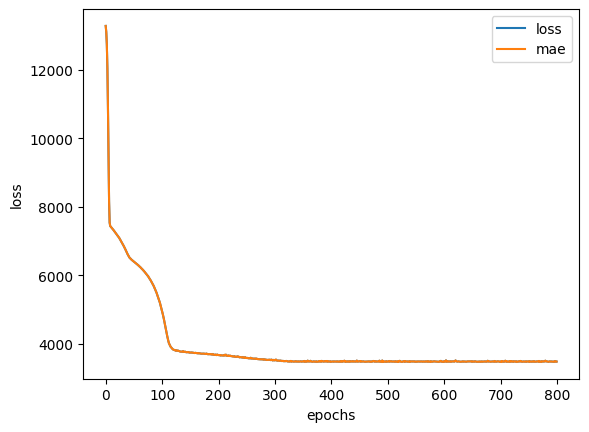

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really.... it depends on the problem you're working on. However, many people have askednthis question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

In [ ]:
# Increase insurance_model_4's epochs
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)
# 1. Create the model
insurance_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_6.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_6.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13294.4561 - mae: 13294.4561
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13107.9551 - mae: 13107.9551
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 12738.9697 - mae: 12738.9697
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 12031.6074 - mae: 12031.6074
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 10862.7832 - mae: 10862.7832
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 9391.2061 - mae: 9391.2061
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 8082.9204 - mae: 8082.9204
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7498.1470 - mae: 7498.1470
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7411.0273 - mae: 7411.0273
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7391.6

## Preprocessing data (normalization and standardisation)

In terms of scaling vaues, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

For further reading: [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # turn all values in these columns between 0 and 1
)

<Axes: ylabel='Frequency'>

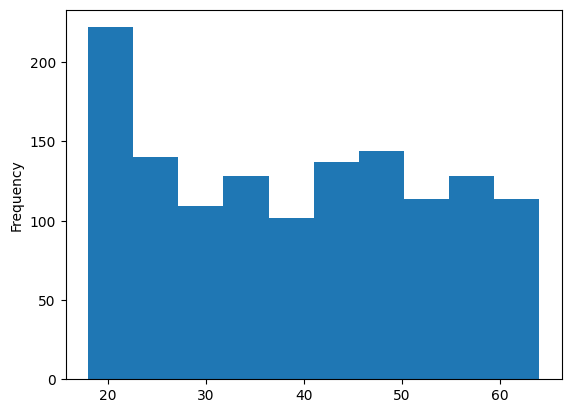

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

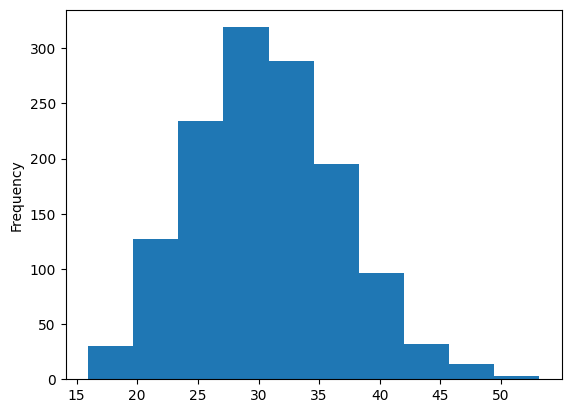

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64